In [34]:
from pandas import *
from sklearn.calibration import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


In [15]:
data = read_csv('./Train_data.csv')
# data.value_counts()
# data.drop(['duration'], axis = 1)

In [16]:
feature = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'num_failed_logins', 'logged_in', 'num_compromised', 'num_file_creations', 'num_outbound_cmds', 'class']
f_data = data[feature]
# f_data.dtypes

Convert object dtypes to int

In [ ]:
label_encoder = LabelEncoder()
for f in ['protocol_type', 'service', 'flag', 'class']:
    f_data[f] = label_encoder.fit_transform(f_data[f])
# f_data.dtypes

In [ ]:
sns.scatterplot(data = f_data, x='protocol_type', y = 'service', hue='class')
# sns.scatterplot(data = f_data, x='protocol_type', y = 'class', hue='service')
plt.savefig('scatter1.png')
plt.show()

split 'm up

In [19]:
X = f_data.drop(['class'], axis = 1)
y = f_data['class']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test.shape

(5039, 10)

# Fit

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train)

In [ ]:
sns.scatterplot(data = X_train, x = 'protocol_type', y = 'service', hue = kmeans.labels_)
plt.savefig('scatter2.png')
plt.show()

In [ ]:
sns.boxplot(x = kmeans.labels_, y = y_train)
plt.savefig('boxplot1.png')
plt.show()

In [24]:
# silhouette_score(X_train, kmeans.labels_, metric='euclidean')

# Get cluster number

In [29]:
K = range(2, 8)
fits = []
score = []
inertia = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train)
    
    # append the model to fits
    # fits.append(model)
    inertia.append(model.inertia_)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

In [26]:
# sns.scatterplot(data = X_train, x = 'protocol_type', y = 'service', hue = fits[0].labels_)
# plt.savefig('scatter3.png')
# plt.show()

In [27]:
# sns.scatterplot(data = X_train, x = 'protocol_type', y = 'service', hue = fits[2].labels_)

In [ ]:
sns.lineplot(x = K, y = inertia)
plt.savefig('elbow.png')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X_train)

y_predict

In [ ]:
kmeans.cluster_centers_

In [53]:
# X_train.iloc[: y_train.shape[0] , : ].shape

(20153, 10)

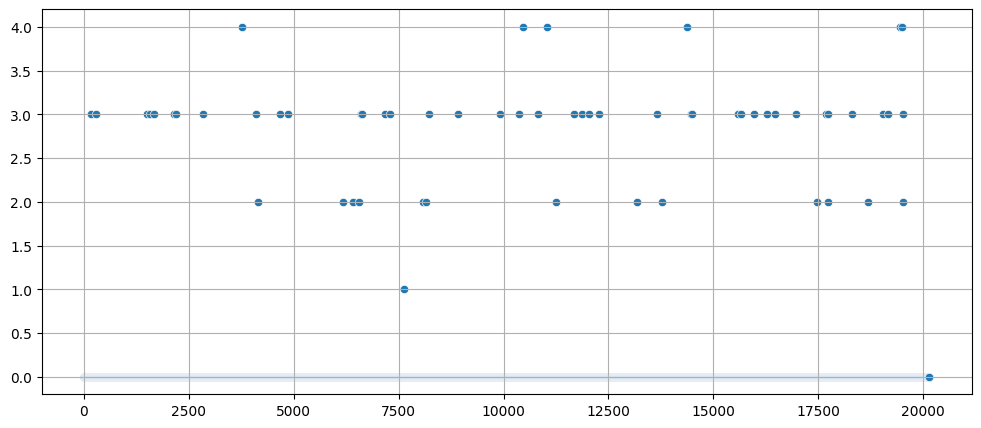

In [63]:
plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
sns.scatterplot(data=y_predict)
plt.grid(True)
# for center in kmeans.cluster_centers_:
#     center = center[:2]
#     plt.scatter(center[0],center[1],marker = '^',c = 'red')
# plt.xlabel("petal length (cm)")
# plt.ylabel("petal width (cm)")
plt.savefig('final.png')
plt.show()